# General
Template for labjournaal. See https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html for options to use markdown.

**Name:** Dylan  
**Title of the experiment:** Spectraallijn  
**Starting date:** 2 Maart 2022  
**Expected enddate:** ???  
**Partner:**  
**Goal of the experiment:** "Het doel van deze proef is de golflengte van deze spectraallijnen zo nauwkeurig mogelijk te bepalen."
**Research question:**  
**Expectations or Hypothesis:**  
**Desired accuracy:**  




In [2]:
#import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

**Configuration**

In [3]:
# Plotgrootte

DEFAULT_FIGSIZE = (12, 9)

# Enum voor verschillende kleuren licht

YELLOW = 'yellow'
GREEN = 'green'
BLUE = 'blue'

# Preparation
 


**Assignments:**  

**Opdracht 1**

Het licht uit beide bronnen komt natuurlijk ook in punt M terecht. Hoe groot is dan het weglengte (fase) verschil? Wat betekent dat in termen van constructieve of destructieve interferentie? Hangt dit af van de golflengte van het licht?

Het weglente verschil is $d \sin \theta$

**Opdracht 2**

Kan m ook negatief zijn? Zo ja, wat betekent dit voor θ? Waar ligt P dan?

Ja. P ligt dan onder M

**Opdracht 3**

Welke invloed heeft een toename in d op m en θ, en welke invloed heeft een afname? En welk effect heeft een toename/afname in m op d en θ en een toename/afname in θ op m en d?

- Een toename in d veroorzaakt alleen een afname in $\theta$.
- Een toename in m veroorzaakt alleen een toename in $\theta$.
- Een toename in $\theta$ veroorzaakt niks, maar in het algemeen neemt m toe of d af.

**Opdracht 4**

In Fig. 20.7 is de richting van de eerste orde buiging van licht met één bepaalde golflengte getekend. Geef de vergelijking voor de hoek voor een volgende orde grootte. Geef van elk van de variabelen in de vergelijking aan of ze constant zijn of niet. Gebruik vgl. (20.1).

$$
\theta = \arcsin \frac{2\lambda}{d}
$$

- $\lambda$: constant
- $d$: constant

**Opdracht 5**

m kan ook negatief zijn. Wat zegt dit over de relatie tussen de hoeken i en $u_m$?

Als i stijgt, stijgt $u_m$. Als i daalt, daalt $u_m$

**Opdracht 6**

Wanneer wordt vgl. (20.2) gelijk aan vgl. (20.1)?

Als $i=0$

**Opdracht 7**

Laat zien dat als je vgl. (20.3) invult in de tralievergelijking (20.2) dat je dan de volgende voorwaarde krijgt voor licht met de golflengte λ op het vaste punt terecht komt.
$$
2 \cos α \sin φ = −mNλ
$$
waarin het N het aantal lijnen per lengte eenheid is, λ de golflengte en m orde van de buiging. m kan positieve en negatieve waarden (en nul) aannemen.

Neem $i=\alpha+\varphi$, $u_m=\alpha-\varphi$. Laat $N=d^{-1}$. Dan

$$
\begin{aligned}
d \sin u_m &= d \sin i + m\lambda\\
d \sin (\alpha-\varphi) &= d \sin (\alpha+\varphi) + m\lambda\\
d (\sin\alpha \cos-\varphi + \cos\alpha \sin-\varphi) &= d (\sin\alpha \cos\varphi + \cos\alpha \sin\varphi) + m\lambda\\
d \sin\alpha \cos\varphi - d \cos\alpha \sin\varphi &= d \sin\alpha \cos\varphi + d \cos\alpha \sin\varphi + m\lambda\\
-d \cos\alpha \sin\varphi &= d \cos\alpha \sin\varphi + m\lambda\\
2d \cos\alpha \sin\varphi &= -m\lambda\\
2 \cos\alpha \sin\varphi &= -md^{-1}\lambda\\
2 \cos\alpha \sin\varphi &= -mN\lambda\\
\end{aligned}
$$

**Opdracht 8**

Voor de situatie geschetst in Fig. 20.11, is m dan positief of negatief? Klopt dat met je antwoord bij vraag 5?

Sinds $0<\alpha<\pi/2$ en $0<\varphi<\pi/2$, $2\cos\alpha\sin\varphi>0$. Sinds $N>0$ en $\lambda>0$, $-m>0$ en $m<0$.

**Opdracht 9**

Met vgl. (20.4) kunnen we uit metingen van α en φ, λ bepalen. Als we de onzekerheden in α en φ, u(α) en u(φ) noemen, leid dan de doorwerkingsformule voor de onzekerheid in λ , u(λ) af.

$$
\begin{aligned}
-mN\lambda &= 2 \cos\alpha \sin\varphi\\
\lambda &= -\frac{2 \cos\alpha \sin\varphi}{mN}\\
u(\lambda) &= 2 \cdot \sqrt{
    \left(
        \frac{u(\cos\alpha) \sin\varphi}{mN}
    \right)^2 +
    \left(
        \frac{\cos\alpha\ u(\sin\varphi)}{mN}
    \right)^2 +
    \left(
         \frac{\cos\alpha \sin\varphi}{m} \cdot u\left(\tfrac{1}{N}\right)
    \right)^2
} \\
u(\cos\alpha) &= | u(\alpha) \cdot -\sin\alpha | = | u(\alpha) \cdot \sin\alpha | \\
u(\sin\varphi) &= | u(\varphi) \cdot \cos\varphi | \\
u\left(\tfrac{1}{N}\right) &= \left| u(N) \cdot -\tfrac{1}{N^2} \right| \\
\end{aligned}
$$

**Opdracht 10**

Met vgl. (20.5) kan uit metingen van u en ∆u, ∆λ bepaald worden. Je wilt natuurlijk de onzekerheid in ∆λ weten. Als je op de gebruikelijke manier de doorwerkingformule gaat uitrekenen, stuit je op een notatieprobleem. Noem daarom in deze vraag de uitgaande hoek v (was u) en het kleine verschil in uitgaande hoek ∆v (was ∆u). Als we de onzekerheden in v en ∆v aangeven met u(v) en u(∆v), leid dan de doorwerkingsformule voor de onzekerheid in ∆λ, u(∆λ) af.

$$
\begin{aligned}
\Delta\lambda &= \frac{\cos v}{mN} \Delta v \\
u(\Delta\lambda) &= \sqrt{
    \left(
        \frac{\Delta v}{mN} u(\cos v)
    \right)^2 +
    \left(
        \frac{\cos v\Delta v}{m} u\left(\tfrac{1}{N}\right)
    \right)^2 +
    \left(
        \frac{\cos v}{mN} u(\Delta v)
    \right)^2
} \\
u(\cos v) &= \left| u(v) \cdot -\sin v \right| = \left| u(v) \cdot \sin v \right| \\
u\left(\tfrac{1}{N}\right) &= \left| u(N) \cdot -\tfrac{1}{N^2} \right| \\
\end{aligned}
$$

**Opdracht 11**

Bedenk tenminste twee redenen waarom in de praktijk het waargenomen oplossend vermogen kleiner is dan de theoretische waarde.

Bij een kleiner oplossend vermogen is het minimale golflengteverschil groter. Een kleiner oplossend vermogen betekent dus dat het moeilijker is om golflengtes van elkaar te scheiden. Dit kan komen (**kan niet uit de formule worden gelezen, dus ik weet niet echt of dit klopt**) door de aanwezigheid van andere bronnen, die de waarnemingen van de camera beïnvloeden. Daarnaast kan de bron meerdere golflengtes uitzenden waardoor het "signaal" verstoord raakt. De gevoeligheid van de camera kan ook een factor zijn.

**Method:**  
**Theory:**  
**Independent variable:**  
**Dependent variable:**  
**Controlled variablen:**  
**Measurement instruments \& Settings:**  
**Procedure:**  
**Setup(drawing or picture):**  
**Notes:**  
**About accuracy:**  


# Execution

**Constants**

In [4]:
# Constants

# Tralieconstante
N = 600e3 # m^-1
u_N = 0 # m^-1

# Hoek van de 0-de orde stand
alpha = np.deg2rad(15)
u_alpha = np.deg2rad(1)

**Measurements**

In [5]:
# Measurements: Explain the names of variables provide only raw data in np.arrays!

# Format: Kleur, Orde, Aflezing (°), Fout (°)
dataset1 = [
    [YELLOW,    1,  3,  1],
    [GREEN,     1,  4,  1],
    [BLUE,      1,  6,  1],
    [BLUE,      -1, 23, 1],
    [GREEN,     -1, 25, 1],
    [YELLOW,    -1, 26, 1],
    [BLUE,      -2, 31, 1],
    [GREEN,     -2, 35, 1],
    [YELLOW,    -2, 37, 1],
    [BLUE,      -3, 40, 1],
    [GREEN,     -3, 46, 1],
    [YELLOW,    -3, 48, 1],
]

# Format: Orde, v, u_v, dv, u_dv
dataset2 = [
    [np.nan, np.nan, np.nan, np.nan, np.nan]
]

Relocate measurements

In [6]:
# Dataset 1

# Kleuren van het licht
color = np.array([entry[0] for entry in dataset1])

# Orde
m = np.array([float(entry[1]) for entry in dataset1])

# Aflezing in graden
theta = np.deg2rad([entry[2] for entry in dataset1])
u_theta = np.deg2rad([entry[3] for entry in dataset1])

# Dataset 2
m2 = np.array([float(entry[0]) for entry in dataset2])

# Hoek van uitval op de camera
v = np.array([float(entry[1]) for entry in dataset2])
u_v = np.array([float(entry[2]) for entry in dataset2])

# Verschil in hoek van uitval op de camera
dv = np.array([float(entry[3]) for entry in dataset2])
u_dv = np.array([float(entry[4]) for entry in dataset2])

**Observations:**  
**Notes:**  

# Processing
**Description of processing of raw data into scientific evidence:**


In [7]:
#Data processing and analysis:

phi = theta - alpha
u_phi = np.sqrt(u_theta**2 + u_alpha**2)
print(f'𝜑 = \n{phi}')
print(f'u(𝜑) = \n{u_phi}')
print()

cos_alpha = np.cos(alpha)
u_cos_alpha = np.abs(u_alpha * np.sin(alpha))
print(f'cos(𝛼) = {cos_alpha}')
print(f'u(cos(𝛼)) = {u_cos_alpha}')
print()

sin_phi = np.sin(phi)
u_sin_phi = np.abs(u_phi * np.cos(phi))
print(f'sin(𝜑) = \n{sin_phi}')
print(f'u(sin(𝜑)) = \n{u_sin_phi}')
print()

N_inv = 1/N
u_N_inv = np.abs(-1*N**-2 * u_N)

wavelength = -2 * np.cos(alpha) * np.sin(phi) / (m * N)
u_wavelength = 2 * np.sqrt(
    (u_cos_alpha * sin_phi * N_inv / m)**2 +
    (cos_alpha * u_sin_phi * N_inv / m)**2 +
    (cos_alpha * sin_phi * u_N_inv / m)**2
)
print(f'𝜆 = \n{wavelength}')
print(f'u(𝜆) = \n{u_wavelength}')
print()

# print()
# print(u_cos_alpha * sin_phi * N_inv / m)
# print(cos_alpha * u_sin_phi * N_inv / m)
# print(cos_alpha * sin_phi * u_N_inv / m)

𝜑 = 
[-0.20943951 -0.19198622 -0.15707963  0.13962634  0.17453293  0.19198622
  0.27925268  0.34906585  0.38397244  0.43633231  0.54105207  0.57595865]
u(𝜑) = 
[0.02468268 0.02468268 0.02468268 0.02468268 0.02468268 0.02468268
 0.02468268 0.02468268 0.02468268 0.02468268 0.02468268 0.02468268]

cos(𝛼) = 0.9659258262890683
u(cos(𝛼)) = 0.004517244503906692

sin(𝜑) = 
[-0.20791169 -0.190809   -0.15643447  0.1391731   0.17364818  0.190809
  0.27563736  0.34202014  0.37460659  0.42261826  0.51503807  0.54463904]
u(sin(𝜑)) = 
[0.02414331 0.02422919 0.0243788  0.02444247 0.0243077  0.02422919
 0.02372652 0.02319414 0.02288539 0.02237011 0.02115719 0.02070064]

𝜆 = 
[6.69424239e-07 6.14357788e-07 5.03680300e-07 4.48102975e-07
 5.59104198e-07 6.14357788e-07 4.43742068e-07 5.50610149e-07
 6.03070305e-07 4.53575437e-07 5.52765087e-07 5.84534344e-07]
u(𝜆) = 
[7.77984937e-08 7.80648984e-08 7.85290378e-08 7.87266151e-08
 7.83084406e-08 7.80648984e-08 3.82530910e-08 3.74283714e-08
 3.69504313e-08 2.4

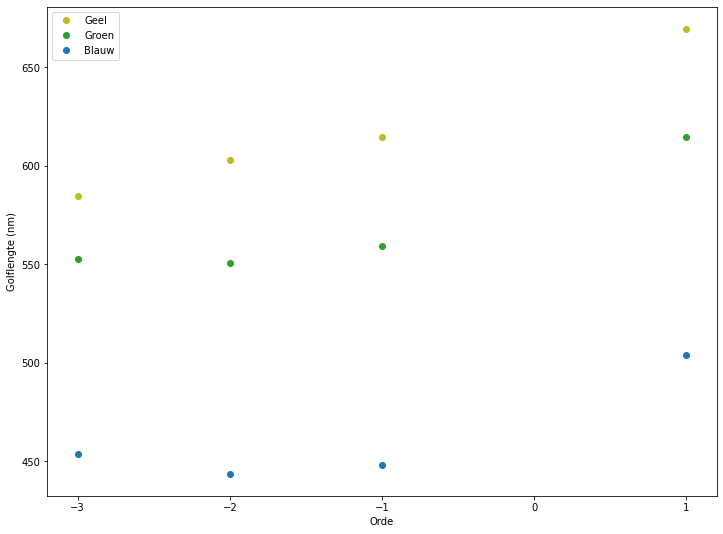

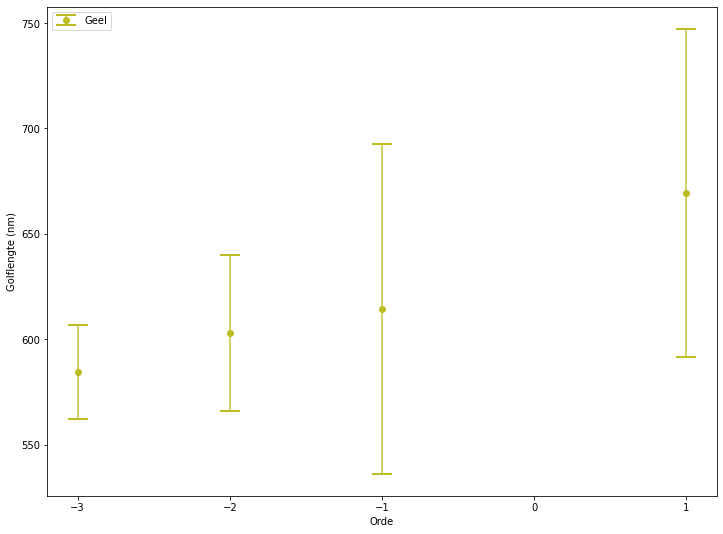

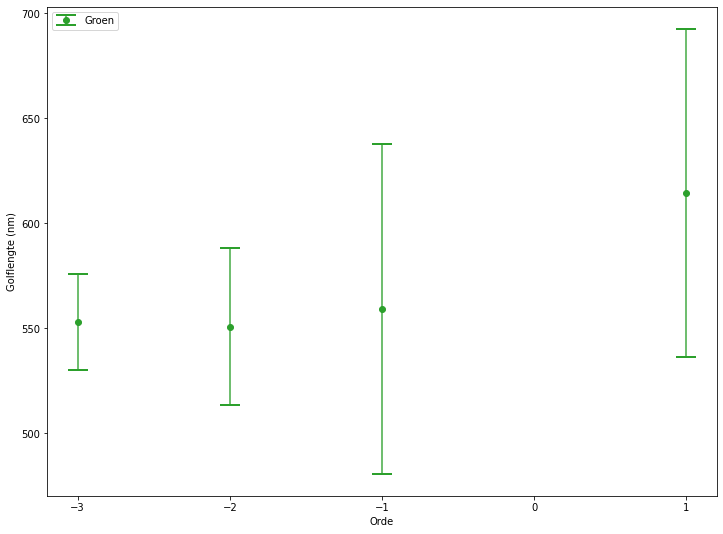

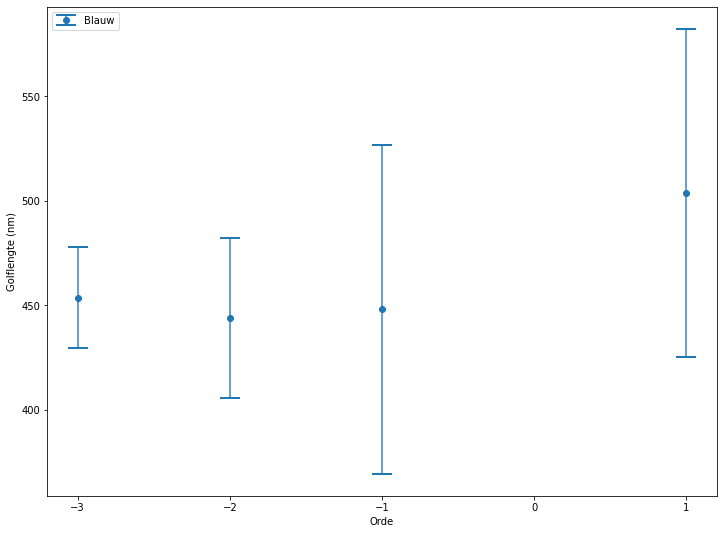

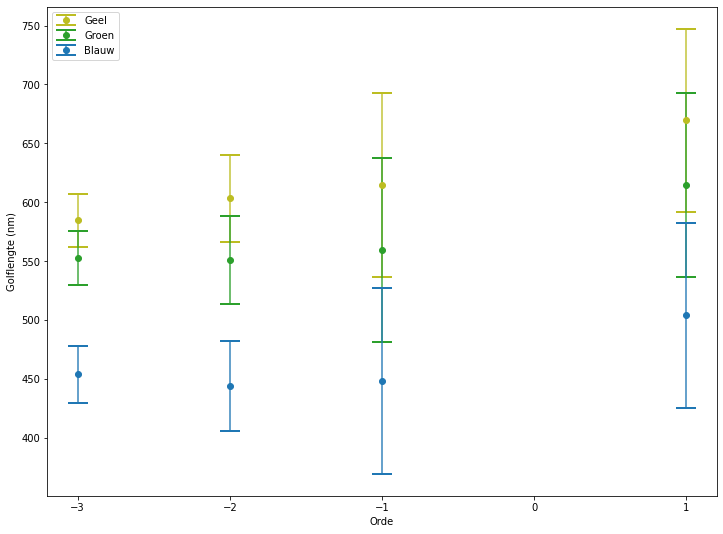

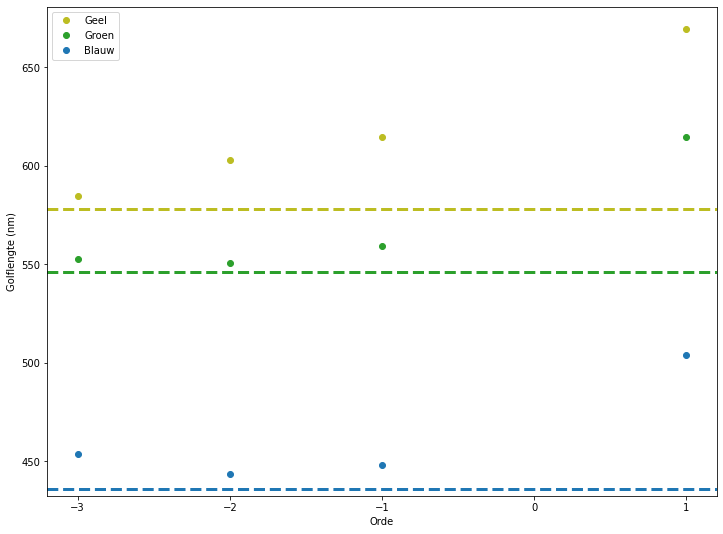

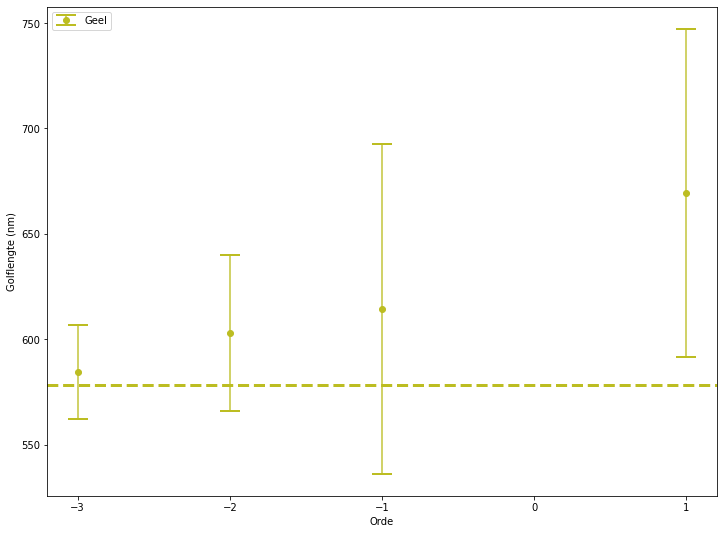

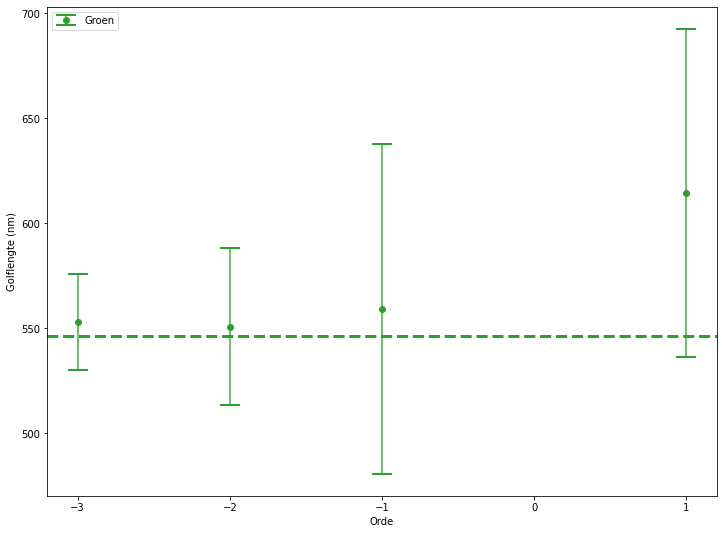

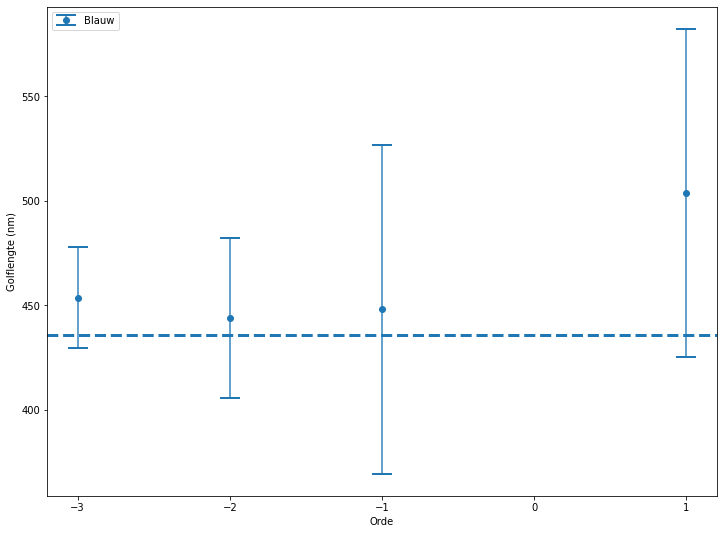

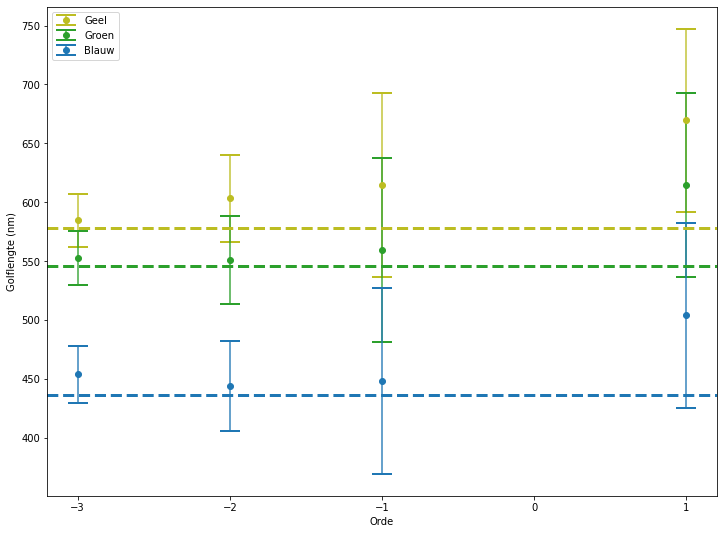

In [17]:
#Data processing and analysis:

def get_color_plot_data_iter():
    return zip(color, m, wavelength * 1e9, u_wavelength * 1e9)

def filter_plot_data_by_color(filter_color):
    return np.array([[*dat] for (c, *dat) in get_color_plot_data_iter() if c == filter_color])

plot_data_yellow = filter_plot_data_by_color(YELLOW)
plot_data_green  = filter_plot_data_by_color(GREEN)
plot_data_blue   = filter_plot_data_by_color(BLUE)

def plot_dots(plt_data, label, color, **kwargs):
    plt.plot(
        plt_data[:,0],
        plt_data[:,1],
        '.',
        label=label,
        color=color,
        markersize=12,
    )

def plot_errorbar(plt_data, label, color, **kwargs):
    eb = plt.errorbar(
        plt_data[:,0],
        plt_data[:,1],
        yerr=plt_data[:,2],
        label=label,
        color=color,
        fmt='.',
        markersize=12,
        capsize=10,
        capthick=2,
        solid_capstyle='projecting',
        **kwargs,
    )
    bars = eb[2]
    for bar in bars:
        bar.set_alpha(0.9)
    return eb

def plot(errorbar=True, colors=None, spectral_lines=False):
    if colors is None:
        colors = [YELLOW, GREEN, BLUE]
    plt.figure(figsize=DEFAULT_FIGSIZE)

    plt.xticks(np.arange(m.min(), m.max() + 1))

    def plot_series(*args, **kwargs):
        if errorbar:
            plot_errorbar(*args, **kwargs)
        else:
            plot_dots(*args, **kwargs)

    if YELLOW in colors:
        plot_series(plot_data_yellow, 'Geel', 'tab:olive')

    if GREEN in colors:
        plot_series(plot_data_green, 'Groen', 'tab:green')

    if BLUE in colors:
        plot_series(plot_data_blue, 'Blauw', 'tab:blue')

    if spectral_lines:
        axhline_style = { 'linewidth': 3, 'linestyle': 'dashed' }
        if YELLOW in colors:
            plt.axhline(578.1, m.min(), m.max(), color='tab:olive', **axhline_style)
        if GREEN in colors:
            plt.axhline(546.1, m.min(), m.max(), color='tab:green', **axhline_style)
        if BLUE in colors:
            plt.axhline(435.8, m.min(), m.max(), color='tab:blue', **axhline_style)

    plt.xlabel('Orde')
    plt.ylabel('Golflengte (nm)')

    plt.legend()
    plt.show()

plot_yellow_only = { 'yellow': True, 'green': False, 'blue': False }
plot_green_only = { 'yellow': False, 'green': True, 'blue': False }
plot_blue_only = { 'yellow': False, 'green': False, 'blue': True }

for sl in [False, True]:
    plot(errorbar=False, spectral_lines=sl)
    plot(colors=[YELLOW], spectral_lines=sl)
    plot(colors=[GREEN], spectral_lines=sl)
    plot(colors=[BLUE], spectral_lines=sl)
    plot(spectral_lines=sl)


In [9]:
#Data processing and analysis:

# Theoretische golflengtes van spectraallijnen van kwik

real_yellow_wl = 578.1e-9
u_real_yellow_wl = 1e-9

real_green_wl = 546.1e-9
u_real_green_wl = 0

real_cyan_wl = 491.6e-9
u_real_cyan_wl = 0

real_blue_wl = 435.8e-9
u_real_blue_wl = 0

real_violet_wl = 404.7e-9
u_real_violet_wl = 0

# Ordenen van golflengtes op spectraallijn

def filter_by_color(x, filter_color):
    return np.array([e for (c, e) in zip(color, x) if c == filter_color])

yellow_wl = filter_by_color(wavelength, YELLOW)
u_yellow_wl = filter_by_color(u_wavelength, YELLOW)
print(f'𝜆_yellow = \n{yellow_wl}')
print(f'u(𝜆_yellow) = \n{u_yellow_wl}')
print()

green_wl = filter_by_color(wavelength, GREEN)
u_green_wl = filter_by_color(u_wavelength, GREEN)
print(f'𝜆_green = \n{green_wl}')
print(f'u(𝜆_green) = \n{u_green_wl}')
print()

blue_wl = filter_by_color(wavelength, BLUE)
u_blue_wl = filter_by_color(u_wavelength, BLUE)
print(f'𝜆_blue = \n{blue_wl}')
print(f'u(𝜆_blue) = \n{u_blue_wl}')
print()

# Berekenen van de gemiddeldes

avg_yellow_wl = np.average(yellow_wl, weights=1 / u_yellow_wl ** 2)
u_avg_yellow_wl = math.sqrt(1 / np.sum(1 / u_yellow_wl ** 2))
print(f'avg(𝜆_yellow) = {avg_yellow_wl}')
print(f'u(avg(𝜆_yellow)) = {u_avg_yellow_wl}')
print()

avg_green_wl = np.average(green_wl, weights=1 / u_green_wl ** 2)
u_avg_green_wl = math.sqrt(1 / np.sum(1 / u_green_wl ** 2))
print(f'avg(𝜆_green) = {avg_green_wl}')
print(f'u(avg(𝜆_green)) = {u_avg_green_wl}')
print()

avg_blue_wl = np.average(blue_wl, weights=1 / u_blue_wl ** 2)
u_avg_blue_wl = math.sqrt(1 / np.sum(1 / u_blue_wl ** 2))
print(f'avg(𝜆_blue) = {avg_blue_wl}')
print(f'u(avg(𝜆_blue)) = {u_avg_blue_wl}')
print()

𝜆_yellow = 
[6.69424239e-07 6.14357788e-07 6.03070305e-07 5.84534344e-07]
u(𝜆_yellow) = 
[7.77984937e-08 7.80648984e-08 3.69504313e-08 2.23845251e-08]

𝜆_green = 
[6.14357788e-07 5.59104198e-07 5.50610149e-07 5.52765087e-07]
u(𝜆_green) = 
[7.80648984e-08 7.83084406e-08 3.74283714e-08 2.28536456e-08]

𝜆_blue = 
[5.03680300e-07 4.48102975e-07 4.43742068e-07 4.53575437e-07]
u(𝜆_blue) = 
[7.85290378e-08 7.87266151e-08 3.82530910e-08 2.41022608e-08]

avg(𝜆_yellow) = 5.951624937327675e-07
u(avg(𝜆_yellow)) = 1.8085007091954716e-08

avg(𝜆_green) = 5.56013902829556e-07
u(avg(𝜆_green)) = 1.8393887790907237e-08

avg(𝜆_blue) = 4.5376675303451674e-07
u(avg(𝜆_blue)) = 1.9144930928112147e-08



In [10]:
# Doe een strijdigheidsanalyse

def is_strijdig(a, u_a, b, u_b):
    return abs(a - b) > 2 * math.sqrt(u_a**2 + u_b**2)

if is_strijdig(avg_yellow_wl, u_avg_yellow_wl, real_yellow_wl, u_real_yellow_wl):
    print("Gele spectraallijn is strijdig")
else:
    print("Gele spectraallijn komt overeen")

if is_strijdig(avg_green_wl, u_avg_green_wl, real_green_wl, u_real_green_wl):
    print("Groene spectraallijn is strijdig")
else:
    print("Groene spectraallijn komt overeen")

if is_strijdig(avg_blue_wl, u_avg_blue_wl, real_blue_wl, u_real_blue_wl):
    print("Blauwe spectraallijn is strijdig")
else:
    print("Blauwe spectraallijn komt overeen")

Gele spectraallijn komt overeen
Groene spectraallijn komt overeen
Blauwe spectraallijn komt overeen


In [11]:
cos_v = np.cos(v)
u_cos_v = np.abs(-np.sin(v) * u_v)
print(f'cos(v) = {cos_v}')
print(f'u(cos(v)) = {u_cos_v}')
print()

delta_wavelength = cos_v * N_inv * dv / m2
u_delta_wavelength = np.sqrt(
    (u_cos_v * N_inv * dv / m2)**2 +
    (cos_v * u_N_inv * dv / m2)**2 +
    (cos_v * N_inv * u_dv / m2)**2
)
print(f'∆𝜆 = {delta_wavelength}')
print(f'u(∆𝜆) = {u_delta_wavelength}')

cos(v) = [nan]
u(cos(v)) = [nan]

∆𝜆 = [nan]
u(∆𝜆) = [nan]


**Describing the pattern in the processed data:**  


In [12]:
#Calculations of e.a. measurement uncertainties, and providing final answers.


**Notes:**  

# Discussion



# Conclusion

# Additional notes, remarks, explanations, thoughts etc